In [173]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

# reading
data = pd.read_csv("/content/drive/MyDrive/Colab Notebook(WBS)/Machine_learning(week8&9)/mushroom competition/train_1.csv") 


In [174]:
data

,cap.shape,cap.color,bruises,stalk.color.above.ring,stalk.color.below.ring,population,Id,poisonous
0,k,e,False,w,w,v,6573,1
1,f,e,True,p,w,y,4426,0
2,b,w,False,w,w,s,7018,0
3,k,g,False,w,w,n,5789,0
4,f,n,True,p,g,v,6187,0
...,...,...,...,...,...,...,...,...
6494,f,g,False,b,b,v,7002,1
6495,k,e,False,p,p,v,7323,1
6496,f,g,False,n,b,y,6206,1
6497,f,n,True,w,w,s,4658,0


In [175]:
#check null values in Dataset
data.isnull().sum()

cap.shape                 0
cap.color                 0
bruises                   0
stalk.color.above.ring    0
stalk.color.below.ring    0
population                0
Id                        0
poisonous                 0
dtype: int64

In [176]:
# to convert False and True
data['bruises'] = data['bruises']*1  

In [177]:
#Convert categorical variable into dummy/indicator variables.
OneHotEn = pd.get_dummies(data, drop_first=True)
OneHotEn.head()

,bruises,Id,poisonous,cap.shape_c,cap.shape_f,cap.shape_k,cap.shape_s,cap.shape_x,cap.color_c,cap.color_e,...,stalk.color.below.ring_n,stalk.color.below.ring_o,stalk.color.below.ring_p,stalk.color.below.ring_w,stalk.color.below.ring_y,population_c,population_n,population_s,population_v,population_y
0,0,6573,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,1,4426,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,0,7018,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,5789,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,1,6187,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [178]:
#import seaborn as sns 
#sns.pairplot(OneHotEn)

###Collinearity
Features that have a perfect (or extremely high) correlation with each other can be considered the same feature.Let's first explore the pairwise correlations between all features.

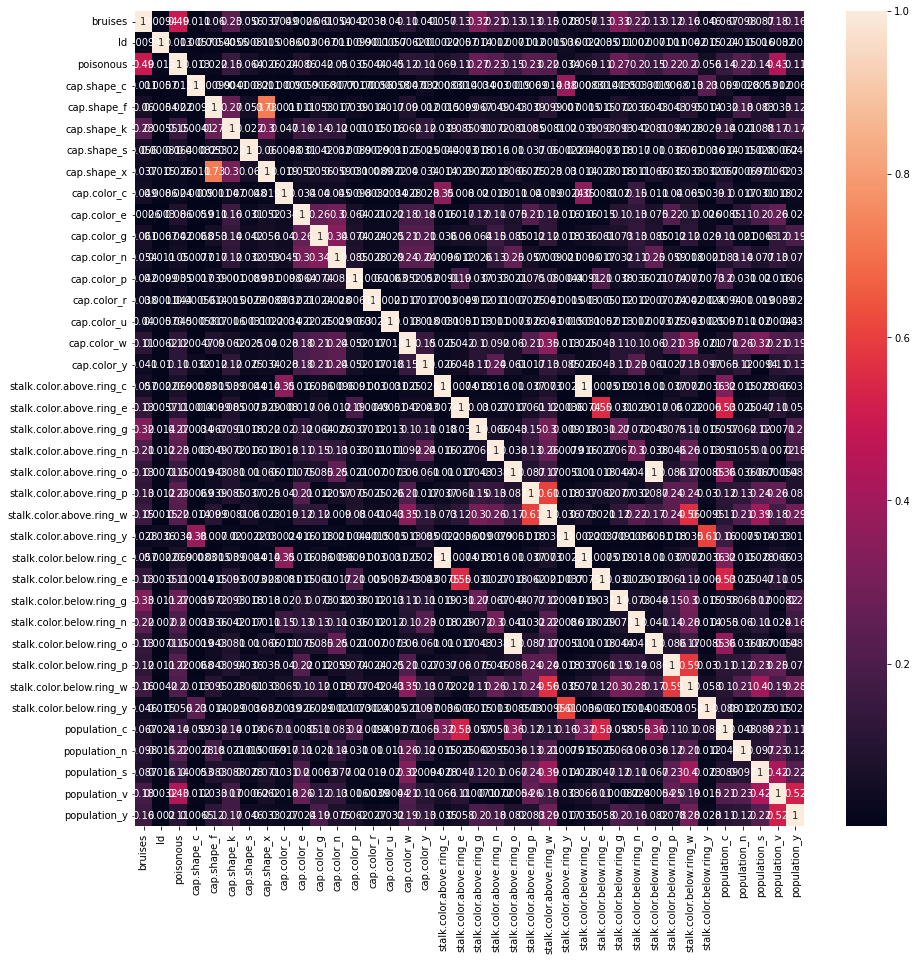

In [179]:
import seaborn as sn
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15))
corrMatrix = OneHotEn.corr().abs()
sn.heatmap(corrMatrix, annot=True);

In [180]:
#OneHotEn=OneHotEn.drop(['cap.shape_c'], axis = 1)
#OneHotEn.shape

In [181]:
OneHotEn=OneHotEn.set_index('Id') #for reseting index as Id

## Split data features into dependent and independent

In [182]:
# X is Independent variables
# y is dependent variables
#drop the traget column
X= OneHotEn
y= X.pop('poisonous')

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state= 123)

## Using RandomForest Classifier

In [184]:
RF = RandomForestClassifier(n_estimators=250, random_state=0)
RF.fit(X_train, y_train)

RandomForestClassifier(n_estimators=250, random_state=0)

In [185]:
from sklearn import metrics
y_test_pred = RF.predict(X_test)
print("Score : {}".format(RF.score(X_test, y_test)))
print("Mean absolute error : {}".format(metrics.mean_absolute_error(y_test, y_test_pred)))
print("R-square Value : {}".format(metrics.r2_score(y_test, y_test_pred)))

Score : 0.9661538461538461
Mean absolute error : 0.033846153846153845
R-square Value : 0.8644739242617738


## Using DecisionTree Classifier

In [186]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
from sklearn import metrics
y_test_pred = DT.predict(X_test)
print("Score : {}".format(DT.score(X_test, y_test)))
print("Mean absolute error : {}".format(metrics.mean_absolute_error(y_test, y_test_pred)))
print("R-square Value : {}".format(metrics.r2_score(y_test, y_test_pred)))

Score : 0.9615384615384616
Mean absolute error : 0.038461538461538464
R-square Value : 0.8459930957520158


## XGB Classifier

In [187]:
XGBc = xgb.XGBClassifier(n_estimators=15,seed=12345)
XGBc.fit(X_train,y_train)
y_test_pred = XGBc.predict(X_test)
print("Score : {}".format(XGBc.score(X_test, y_test)))
print("Mean absolute error : {}".format(metrics.mean_absolute_error(y_test, y_test_pred)))
print("R-square Value : {}".format(metrics.r2_score(y_test, y_test_pred)))

Score : 0.8961538461538462
Mean absolute error : 0.10384615384615385
R-square Value : 0.5841813585304425


## Confusion matrix

In [188]:
from sklearn.metrics import confusion_matrix

confusion_matrix= confusion_matrix(y_test, y_test_pred, labels=None, sample_weight=None, normalize=None)
confusion_matrix

array([[652,  19],
       [116, 513]])

In [189]:
from sklearn.metrics import classification_report

classification_report(y_test, y_test_pred,labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')

'              precision    recall  f1-score   support\n\n           0       0.85      0.97      0.91       671\n           1       0.96      0.82      0.88       629\n\n    accuracy                           0.90      1300\n   macro avg       0.91      0.89      0.89      1300\nweighted avg       0.90      0.90      0.90      1300\n'

In [190]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       671
           1       0.96      0.82      0.88       629

    accuracy                           0.90      1300
   macro avg       0.91      0.89      0.89      1300
weighted avg       0.90      0.90      0.90      1300



## On Testing data

In [191]:
test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebook(WBS)/Machine_learning(week8&9)/mushroom competition/test.csv")
test_data['bruises'] = test_data['bruises']*1 

In [192]:
test_data.set_index("Id", inplace=True)  #reset index as Id

In [193]:
OneHotEn1 = pd.get_dummies(test_data, drop_first=True)
OneHotEn1.head()

,bruises,cap.shape_c,cap.shape_f,cap.shape_k,cap.shape_s,cap.shape_x,cap.color_c,cap.color_e,cap.color_g,cap.color_n,...,stalk.color.below.ring_n,stalk.color.below.ring_o,stalk.color.below.ring_p,stalk.color.below.ring_w,stalk.color.below.ring_y,population_c,population_n,population_s,population_v,population_y
Id,,,,,,,,,,,,,,,,,,,,,
5165,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4281,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
231,1,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3890,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1521,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [194]:
#OneHotEn1=OneHotEn.drop(['cap.shape_c'], axis = 1)
#OneHotEn1.shape

In [195]:
# To predict test data using XGB full pipeline
test_preds = RF.predict(OneHotEn1)  


In [196]:
# Two cloumns are needed to make dataframe 
result = pd.DataFrame({'Id': OneHotEn1.index,             
                       'poisonous': test_preds})

In [197]:
result

,Id,poisonous
0,5165,1
1,4281,1
2,231,0
3,3890,0
4,1521,1
...,...,...
1620,983,1
1621,7055,0
1622,7456,1
1623,5132,0


In [198]:
# To covert dataframe to CSV
result.to_csv('funguy.csv', index=False)

In [199]:
# For download CSV file
from google.colab import files
files.download("funguy.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>